In [4]:
import pandas as pd

# Load datasets
imdb_data = pd.read_csv('Tal/imdb_labelled.txt', delimiter='\t', header=None, names=['Sentence', 'Label'])
amazon_data = pd.read_csv('Tal/amazon_cells_labelled.txt', delimiter='\t', header=None, names=['Sentence', 'Label'])
readme_data = pd.read_csv('Tal/readme.txt', delimiter='\t', header=None, names=['Sentence', 'Label'])

# Merge datasets
df = pd.concat([imdb_data, amazon_data, readme_data], ignore_index=True)

# Inspect data
print(df.info())  # Check for missing values and data types
print(df.head())  # View first 5 rows

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Ensure balanced dataset
print("\nLabel distribution:\n", df['Label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sentence  1769 non-null   object 
 1   Label     1748 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.8+ KB
None
                                            Sentence  Label
0  A very, very, very slow-moving, aimless movie ...    0.0
1  Not sure who was more lost - the flat characte...    0.0
2  Attempting artiness with black & white and cle...    0.0
3       Very little music or anything to speak of.      0.0
4  The best scene in the movie was when Gerardo i...    1.0

Duplicate rows: 16

Label distribution:
 Label
1.0    877
0.0    858
Name: count, dtype: int64


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

# Ensure fresh downloads of necessary resources
nltk.download('punkt_tab', force=True)
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Load stopwords once

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Example DataFrame
data = {'Sentence': ['This is a sample sentence.', 'Another example, with numbers: 123.']}
df = pd.DataFrame(data)

# Apply preprocessing
df['Cleaned_Sentence'] = df['Sentence'].apply(preprocess_text)

# Display the result
print(df.head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                              Sentence        Cleaned_Sentence
0           This is a sample sentence.         sample sentence
1  Another example, with numbers: 123.  another example number


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Example DataFrame
data = {
    'Sentence': ['This is a sample sentence.', 'Another example, with numbers: 123.'],
    'Label': [0, 1]  # Example labels
}
df = pd.DataFrame(data)

# Preprocessed sentences (assuming 'Cleaned_Sentence' is available from previous code)
df['Cleaned_Sentence'] = ['sample sentence', 'another example number']  # Example cleaned sentences

# Configure TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=2000,  # Limit number of features
                             ngram_range=(1, 2),  # Unigrams and bigrams
                             stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df['Cleaned_Sentence'])
y = df['Label']  # Labels for supervised tasks

# Display feature names and sample transformed data
print("Top 10 feature names:", vectorizer.get_feature_names_out()[:10])
print("\nShape of feature matrix:", X.shape)


Top 10 feature names: ['example' 'example number' 'number' 'sample' 'sample sentence' 'sentence']

Shape of feature matrix: (2, 6)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

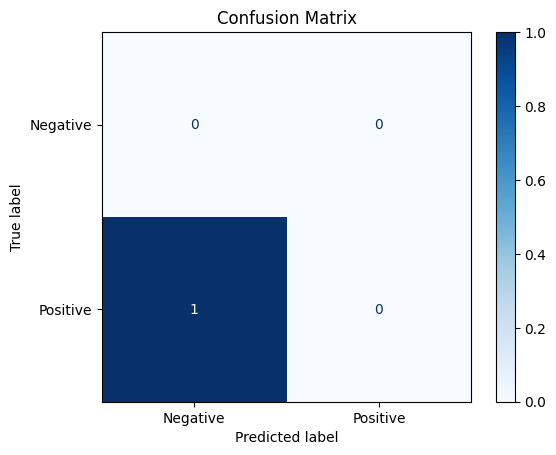

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
